In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the path to your CSV file
csv_file_path = r'C:\Users\rekos\Downloads\covid\worldwide-aggregated_csv.csv'
df = pd.read_csv(csv_file_path)

# Display the first few rows of the data
print(df.head(10))
# print(data.columns)
# print(data.dtypes)
# print(data.info())
# print(data.describe())
print(df.isnull().sum())  # Check for missing values
# print(df.shape)  # Display the shape of the DataFrame
print(df.columns.tolist())  # Display the list of column names
# print(data.index.tolist())  # Display the list of index values
# Display the data types of each column

         Date  Confirmed  Recovered  Deaths  Increase rate
0  2020-01-22        555         28      17            NaN
1  2020-01-23        654         30      18      17.837838
2  2020-01-24        941         36      26      43.883792
3  2020-01-25       1434         39      42      52.391073
4  2020-01-26       2118         52      56      47.698745
5  2020-01-27       2927         61      82      38.196412
6  2020-01-28       5578        107     131      90.570550
7  2020-01-29       6166        126     133      10.541413
8  2020-01-30       8234        143     171      33.538761
9  2020-01-31       9927        222     213      20.561088
Date             0
Confirmed        0
Recovered        0
Deaths           0
Increase rate    1
dtype: int64
['Date', 'Confirmed', 'Recovered', 'Deaths', 'Increase rate']


In [17]:
# Filter for specific countries of interest
countries_of_interest = ['Kenya', 'USA', 'India']
# Add a location column (example: assigning all rows to 'Global')
df['location'] = 'Global'

# Now filter for specific countries of interest
df = df[df['location'].isin(countries_of_interest)]

# Drop rows with missing critical values: assuming date is critical
df = df.dropna(subset=['Date'])

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Handle missing numeric values - you can choose to fill, drop, or interpolate
# Here, we'll fill missing numeric values with the column's mean.
numeric_cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())

print("Data cleaned successfully!")
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Data cleaned successfully!

Missing values after cleaning:
Date             0
Confirmed        0
Recovered        0
Deaths           0
Increase rate    0
location         0
dtype: int64


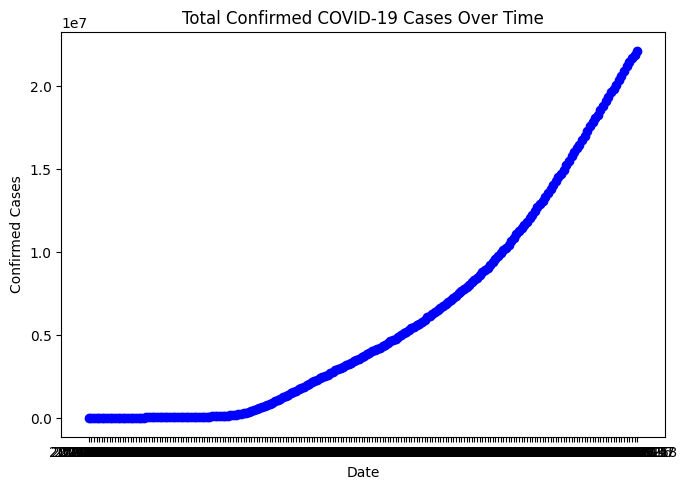

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
plt.plot(df['Date'], df['Confirmed'], marker='o', color='blue')
plt.title("Total Confirmed COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
# plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Deaths'], marker='o', color='red')
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.grid(True)
plt.tight_layout()
plt.show()


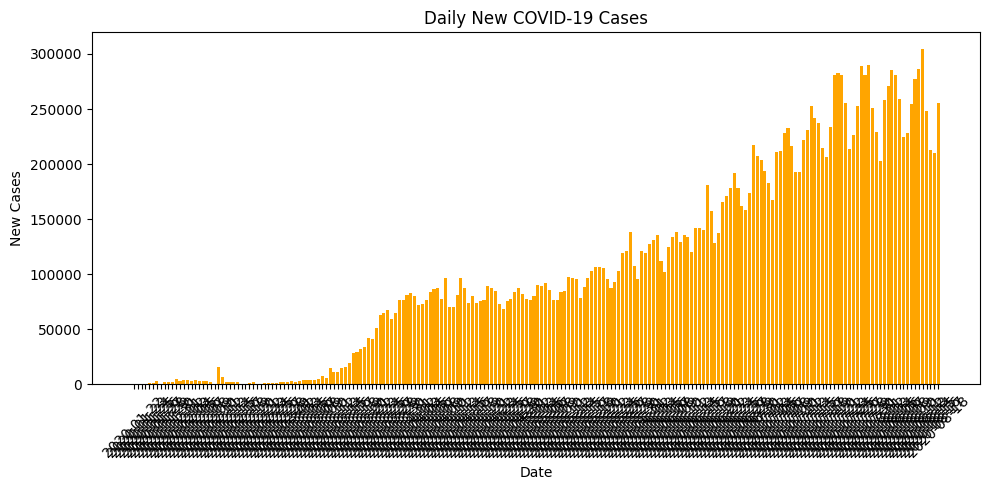

In [12]:
df['New Cases'] = df['Confirmed'].diff().fillna(0).astype(int)

plt.figure(figsize=(10, 5))
plt.bar(df['Date'], df['New Cases'], color='orange')
plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df['Death Rate (%)'] = (df['Deaths'] / df['Confirmed']) * 100

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Death Rate (%)'], marker='o', color='purple')
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


         Date Country/Region Province/State       Lat       Long  Confirmed  \
0  2020-01-22    Afghanistan            NaN  33.93911  67.709953          0   
1  2020-01-23    Afghanistan            NaN  33.93911  67.709953          0   
2  2020-01-24    Afghanistan            NaN  33.93911  67.709953          0   
3  2020-01-25    Afghanistan            NaN  33.93911  67.709953          0   
4  2020-01-26    Afghanistan            NaN  33.93911  67.709953          0   

   Recovered  Deaths  
0        0.0       0  
1        0.0       0  
2        0.0       0  
3        0.0       0  
4        0.0       0  
            Date Country/Region Province/State     Lat     Long  Confirmed  \
6780  2020-01-22         Brazil            NaN -14.235 -51.9253          0   
6781  2020-01-23         Brazil            NaN -14.235 -51.9253          0   
6782  2020-01-24         Brazil            NaN -14.235 -51.9253          0   
6783  2020-01-25         Brazil            NaN -14.235 -51.9253          0 

C:\Users\rekos\AppData\Local\Temp\ipykernel_25248\3102692363.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])


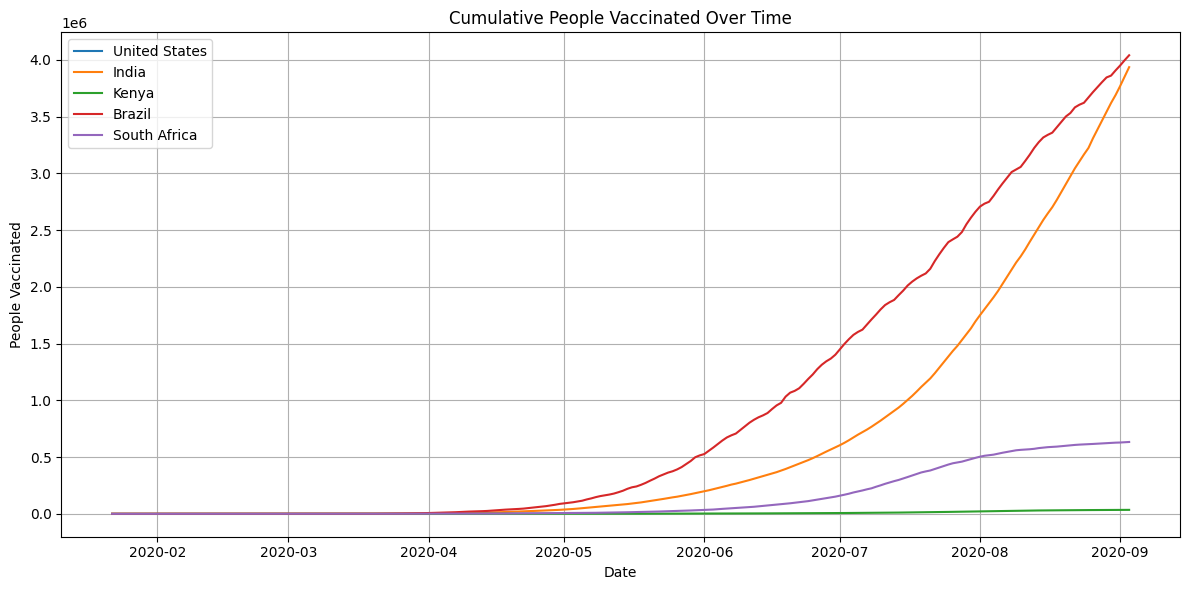

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\rekos\Downloads\covid\time-series-19-covid-combined_csv23_sep.csv')
# Filter for selected countries
print(df.head(5))
countries = ["United States", "India", "Kenya", "Brazil", "South Africa"]
df_filtered = df[df['Country/Region'].isin(countries)]
# print(df_filtered.head(5))
# Convert date column
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Plot cumulative vaccinations
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country)

plt.title("Cumulative People Vaccinated Over Time")
plt.xlabel("Date")
plt.ylabel("People Vaccinated")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

